In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
Table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crop_yeild_dataset.csv')

In [7]:
Table.head(10000)

,crop,region,N,P,K,temperature,humidity,rainfall,ph,area_ha,production_t
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3
...,...,...,...,...,...,...,...,...,...,...,...
9995,cotton,Punjab,66.8,46.8,60.0,27.4,80.9,36.3,7.31,528,1057.8
9996,wheat,Karnataka,118.7,62.7,31.3,32.8,84.5,69.7,5.83,501,1421.8
9997,sugarcane,Maharashtra,146.7,51.3,194.3,42.6,54.3,21.2,7.26,114,9566.8
9998,rice,Punjab,90.1,52.7,67.9,26.2,26.7,33.4,7.48,663,1670.3


In [8]:
Crop_Table = Table.rename(columns = {"crop":"Crop", "region": "Region", "N":"Nitrogen (N)","P":"Phosphorus (P)","K":"Potassium (K)","temperature": "Temperature (C)", "humidity": "Humidity ", "rainfall":"Rainfall (mm)","ph":"Soil PH","area_ha":"Area (Hectare)", "production_t":"Production (Ton)"})
Crop_Table.head(10000)

,Crop,Region,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (C),Humidity,Rainfall (mm),Soil PH,Area (Hectare),Production (Ton)
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3
...,...,...,...,...,...,...,...,...,...,...,...
9995,cotton,Punjab,66.8,46.8,60.0,27.4,80.9,36.3,7.31,528,1057.8
9996,wheat,Karnataka,118.7,62.7,31.3,32.8,84.5,69.7,5.83,501,1421.8
9997,sugarcane,Maharashtra,146.7,51.3,194.3,42.6,54.3,21.2,7.26,114,9566.8
9998,rice,Punjab,90.1,52.7,67.9,26.2,26.7,33.4,7.48,663,1670.3


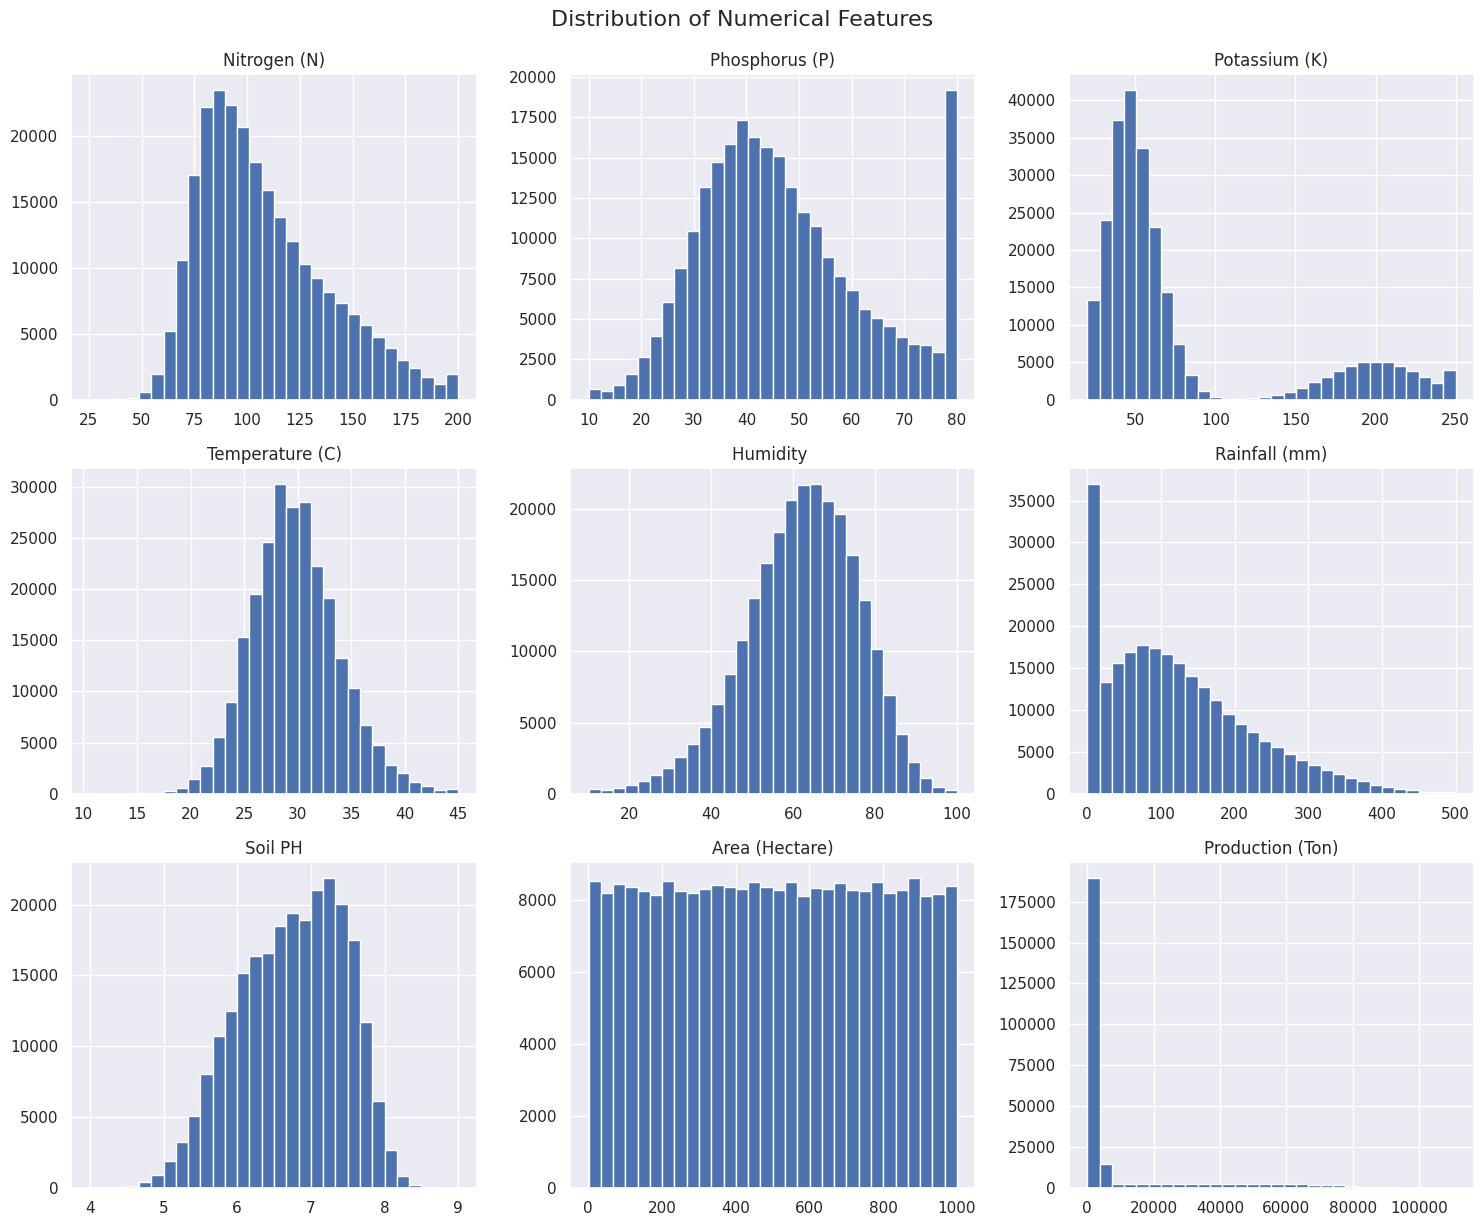

In [10]:
# Histograms
numerical_cols = ['Nitrogen (N)','Phosphorus (P)','Potassium (K)','Temperature (C)','Humidity ', 'Rainfall (mm)','Soil PH','Area (Hectare)','Production (Ton)']

Crop_Table[numerical_cols].hist(bins=30, figsize=(15, 12), layout=(3, 3))
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.show()

In [14]:
#Check null values
if Crop_Table.isnull().sum().sum():
  print("\nNull values found.\n")
  print("0 Values Percentage = ", (((Crop_Table.isnull()).sum().sum() / len(Crop_Table)) * 100) ,"%")
else :
  print("\nNo Null values found.")
  print("0 Values Percentage = ", (((Crop_Table.isnull()).sum().sum() / len(Crop_Table)) * 100) ,"%")

#Check 0 values in Table
if (Crop_Table == 0).sum().sum():
  print("\n0 or 0.0 values found.")
  print("0 Values Percentage = ", (((Crop_Table == 0).sum().sum() / len(Crop_Table)) * 100) ,"%")
else:
  print("\nNo 0 or 0.0 values found.")
  print("0 Values Percentage = ", (((Crop_Table == 0).sum().sum() / len(Crop_Table)) * 100) ,"%")


No Null values found.
0 Values Percentage =  0.0 %

0 or 0.0 values found.
0 Values Percentage =  10.3648 %


In [13]:

# Delete rows where any column has a value of 0
New_Crop_Table = Crop_Table[~(Crop_Table == 0).any(axis=1)]

New_Crop_Table.head(10000)

,Crop,Region,Nitrogen (N),Phosphorus (P),Potassium (K),Temperature (C),Humidity,Rainfall (mm),Soil PH,Area (Hectare),Production (Ton)
0,rice,Karnataka,70.7,43.6,54.9,27.2,61.2,255.9,6.95,268,928.2
1,rice,Punjab,108.8,46.9,43.4,25.5,58.7,87.0,7.08,605,2213.1
2,maize,West Bengal,91.9,34.7,30.4,27.5,73.5,349.9,5.99,410,2409.2
3,rice,Maharashtra,120.0,51.6,64.3,30.4,44.2,3.7,7.20,986,2303.9
4,sugarcane,Maharashtra,164.8,57.0,173.0,24.0,39.5,43.0,6.81,941,77299.3
...,...,...,...,...,...,...,...,...,...,...,...
11173,sugarcane,Maharashtra,116.4,80.0,184.2,30.8,39.9,7.1,7.89,148,11641.9
11174,rice,Punjab,102.3,48.8,24.1,28.4,53.2,84.1,6.98,316,904.8
11175,rice,Tamil Nadu,109.9,38.1,45.0,31.0,57.6,152.5,6.84,470,1202.5
11176,sugarcane,Tamil Nadu,159.7,34.3,166.3,34.2,77.8,23.6,7.00,208,18672.3


In [15]:
if (New_Crop_Table == 0.0).sum().sum():
  print("\nMissing values found.")
  print("0 Values Percentage = ", (((New_Crop_Table == 0).sum().sum() / len(New_Crop_Table)) * 100) ,"%")
else:
  print("\nNo Missing values found.")
  print("0 Values Percentage = ", (((New_Crop_Table == 0).sum().sum() / len(New_Crop_Table)) * 100) ,"%")


No Missing values found.
0 Values Percentage =  0.0 %


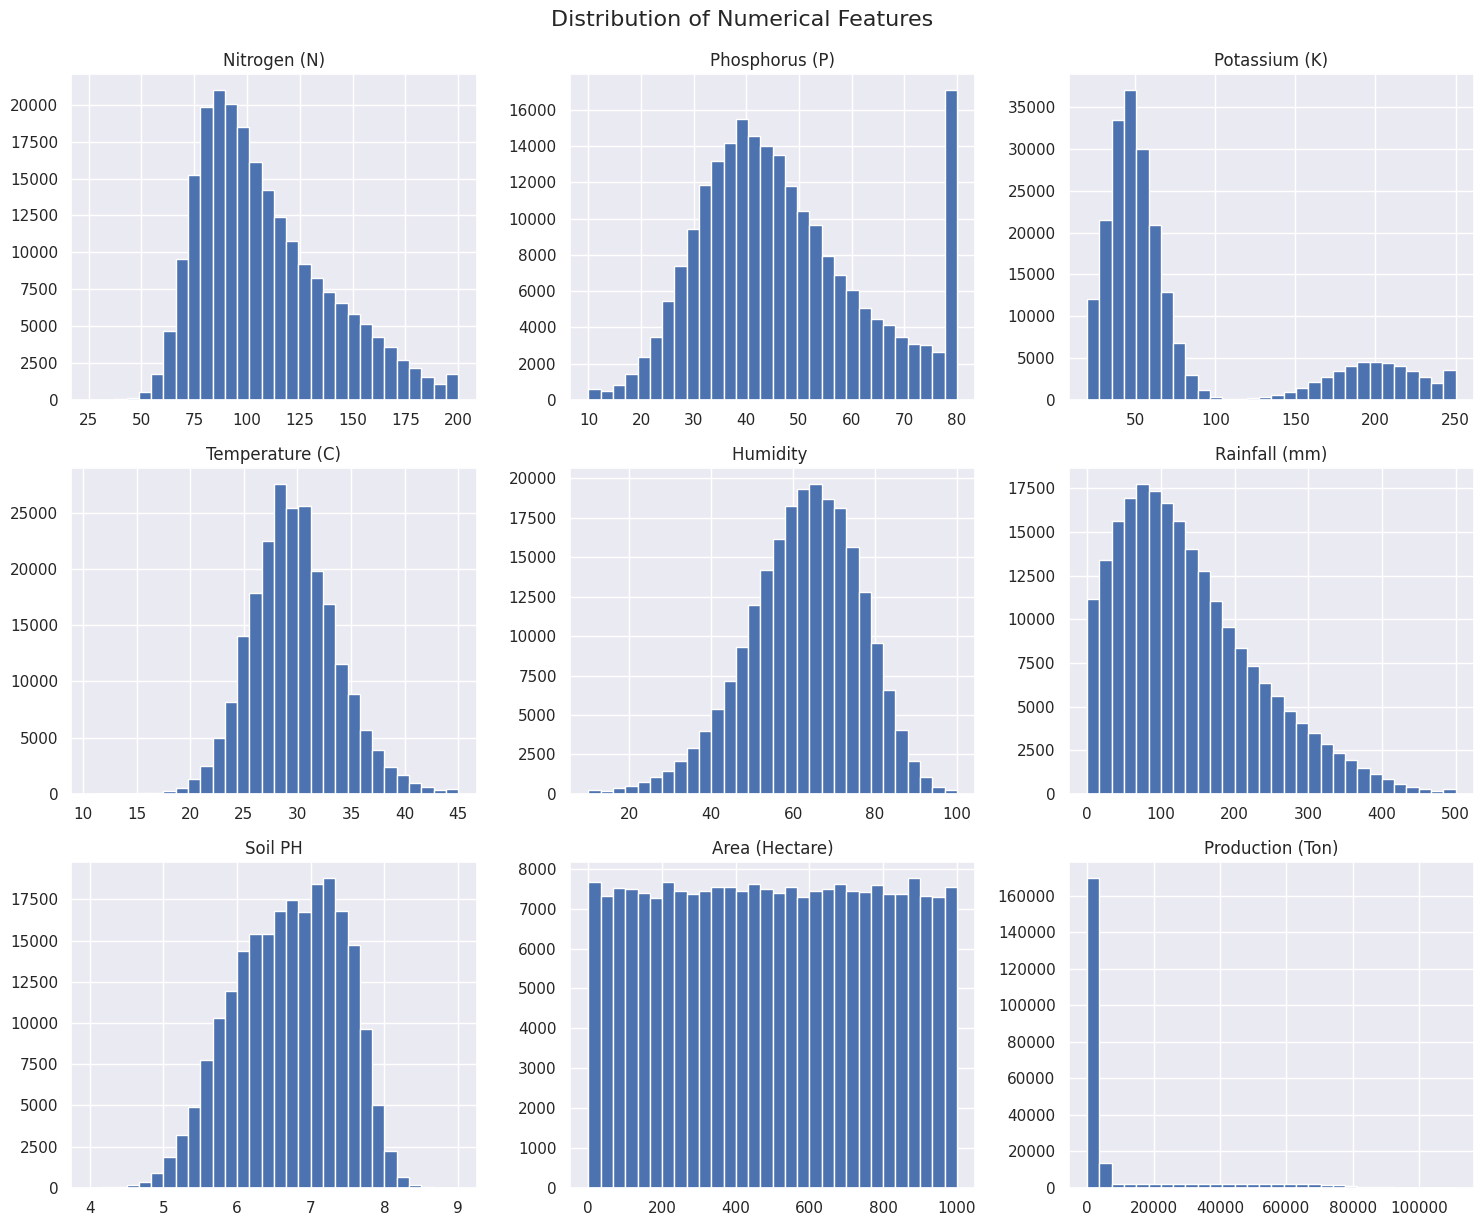

In [19]:
# Histograms
numerical_cols = ['Nitrogen (N)','Phosphorus (P)','Potassium (K)','Temperature (C)','Humidity ', 'Rainfall (mm)','Soil PH','Area (Hectare)','Production (Ton)']

New_Crop_Table[numerical_cols].hist(bins=30, figsize=(15, 12), layout=(3, 3))
plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.show()